In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from fastai.text.all import *

In [2]:
df_tl = pd.read_csv('questions_ds.csv')
df_tl.tail()

,label,text,cid
1239,Reporting - Media Coverup,is the media hiding what is really going on in us hospitals amidst covid,91
1240,Treatment - Quinine,can quinine be taken to fight this covid virus,207
1241,Treatment - Quinine,why is quinine effective in curing covid,207
1242,Other - Food Shortages,could we run out of things to eat,60
1243,Other - Food Shortages,do i need to stock up on food,60


In [3]:
groupedByLabel = df_tl.groupby(['cid'])
df_grouped_by_label = groupedByLabel.size().reset_index(name='counts')
df_grouped_by_label

,cid,counts
0,0,2
1,1,2
2,2,6
3,3,9
4,4,7
...,...,...
203,203,2
204,204,8
205,205,8
206,206,6


In [7]:
df_grouped_by_label[df_grouped_by_label['counts'] == 3]

,cid,counts
14,14,3
17,17,3
20,20,3
28,28,3
36,36,3
59,59,3
75,75,3
76,76,3
82,82,3
83,83,3


In [16]:
# Save the category and counts pair for later use
df_grouped_by_label.to_csv('category_counts.csv', index=False)

In [8]:
df_grouped_by_label_count = df_grouped_by_label.groupby(['counts'])
df_grouped_by_label_count.size()

counts
2     68
3     21
6     48
7     16
8     14
9      9
10     4
11     8
12     6
13     3
14     2
16     3
18     2
23     1
24     1
26     1
28     1
dtype: int64

In [7]:
type(df_grouped_by_label)

pandas.core.frame.DataFrame

### Let's see the distribution of number of sampling data for each category

In [10]:
df_labels = pd.read_csv('labels.csv')
df_labels.head()

,label,cid
0,Comparison - Black Death,0
1,Comparison - COVID and HIV,1
2,Comparison - COVID versus Flu Diagnosis,2
3,Comparison - Difference from Flu,3
4,Comparison - Earlier Existence,4


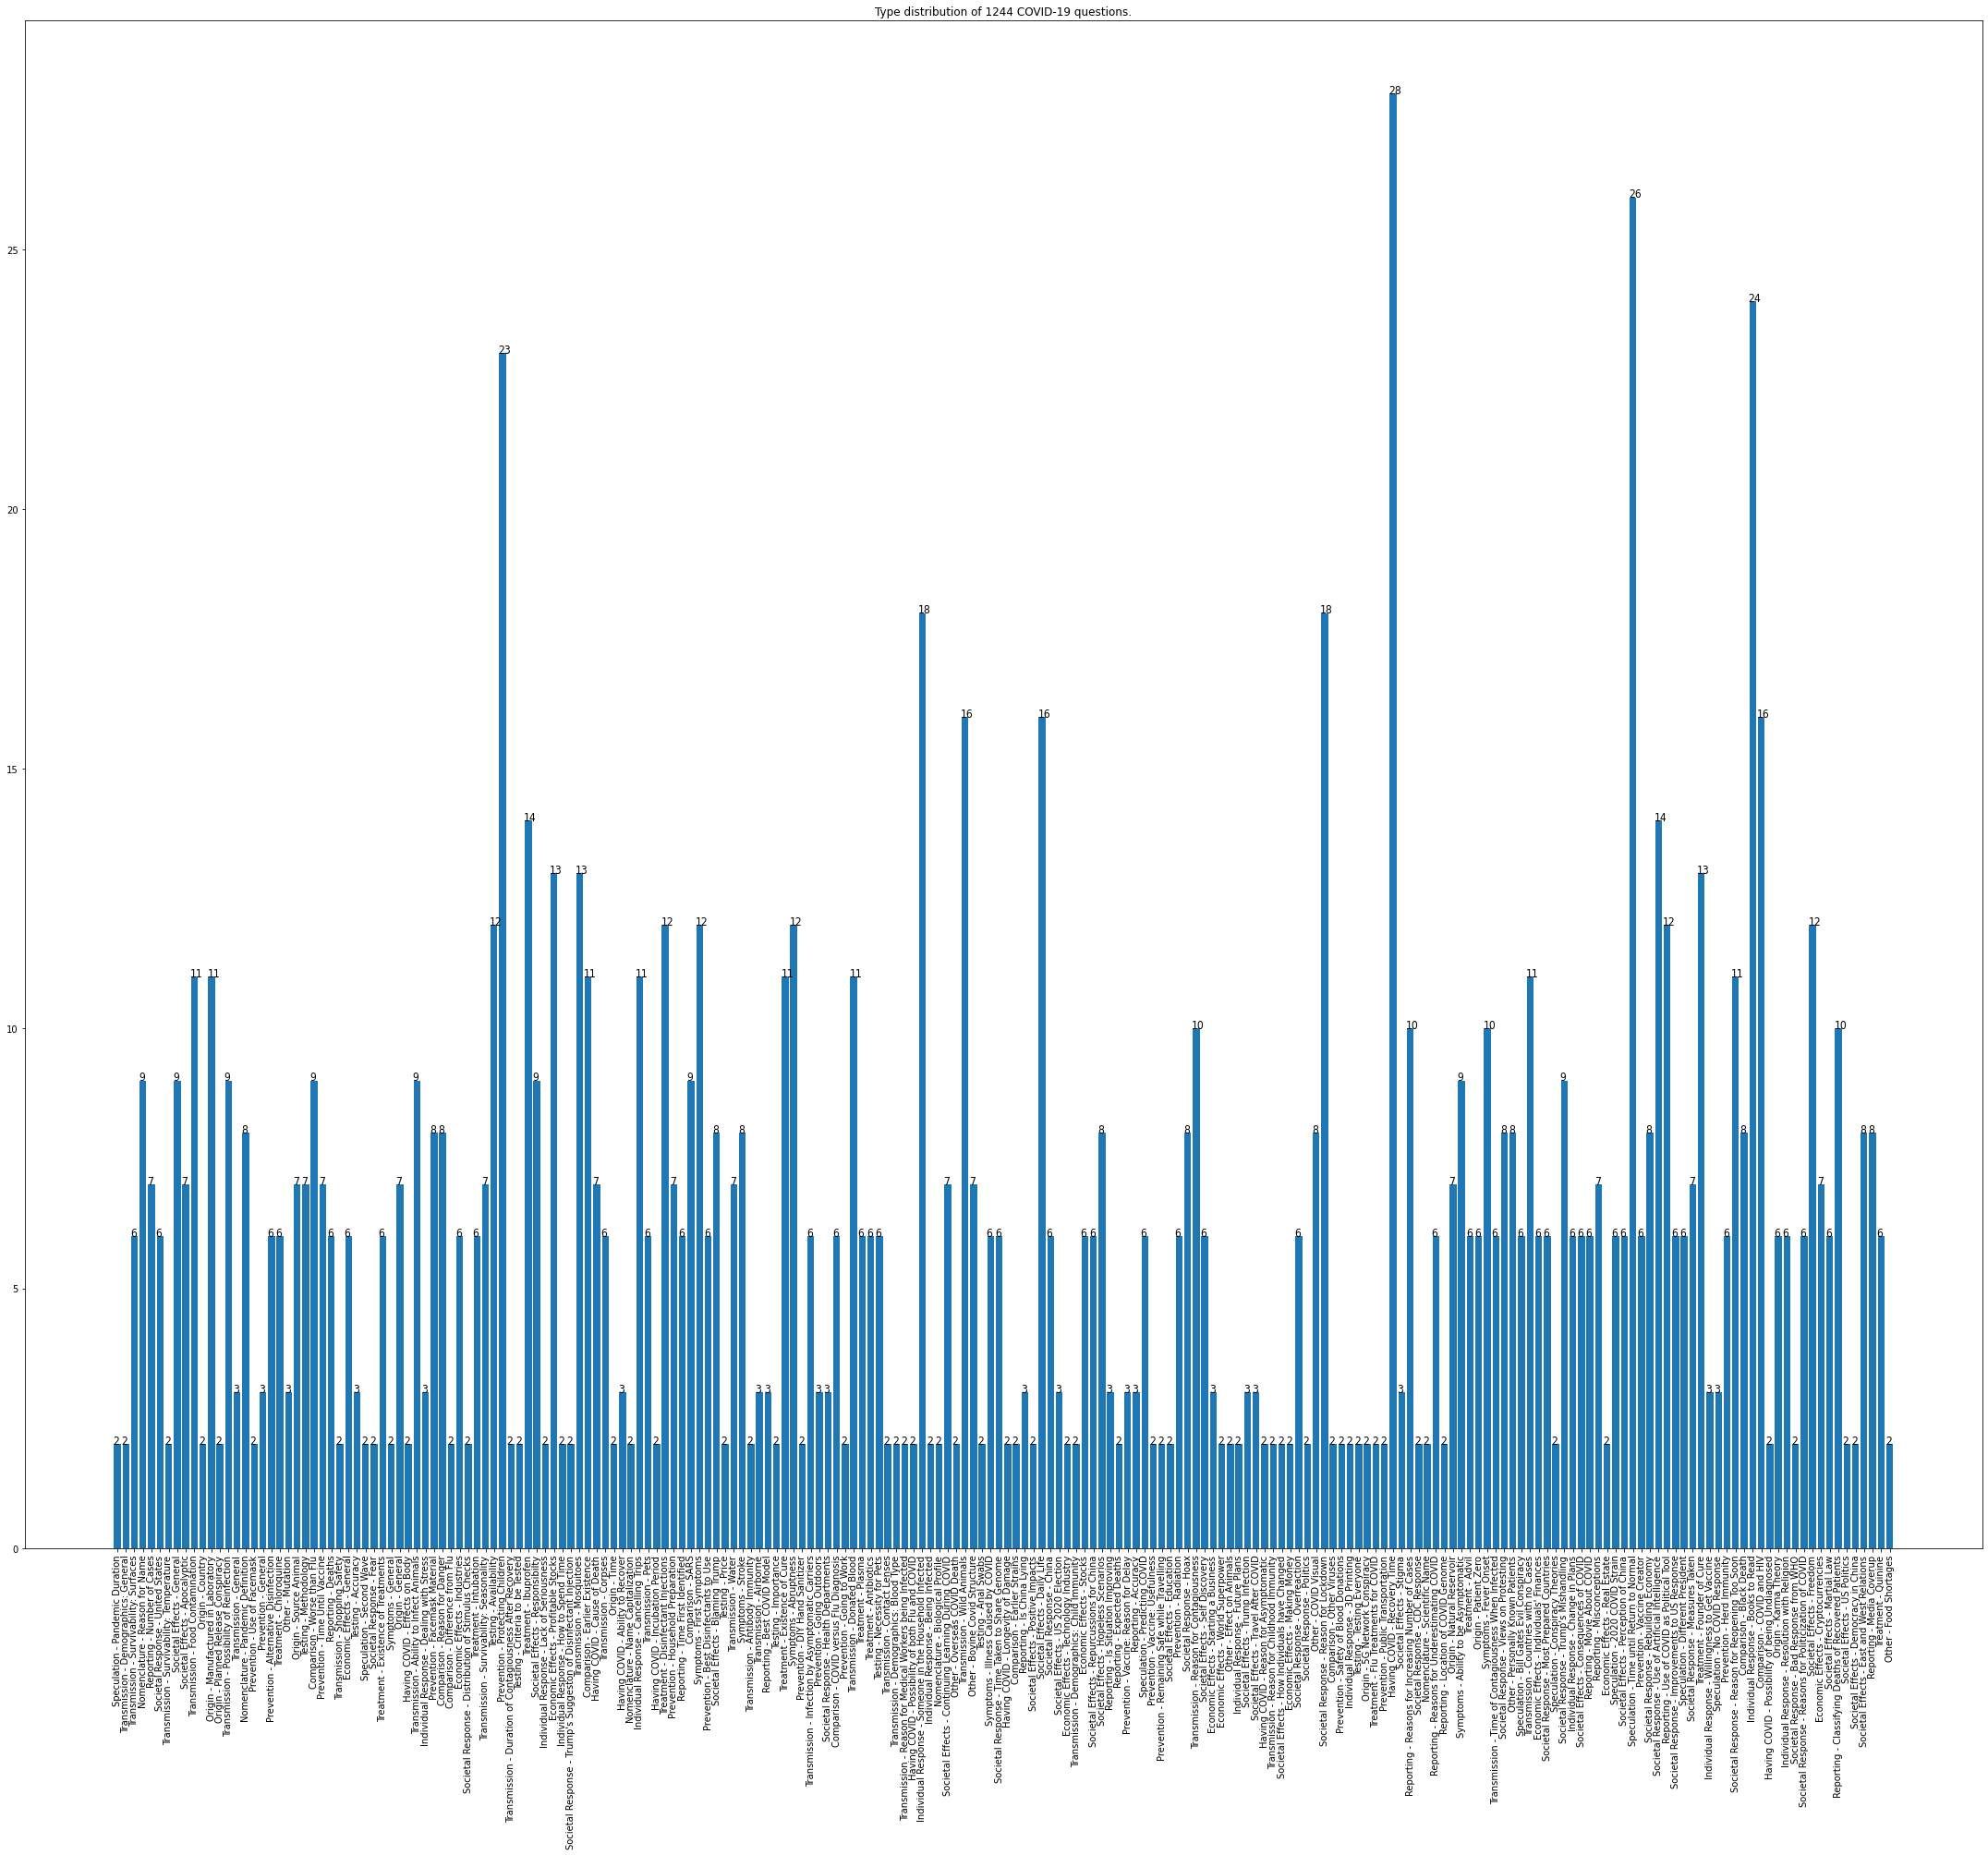

In [11]:
f = lambda x: df_tl[df_tl['cid'] == x].shape[0]

comment_types = df_tl['cid'].unique().tolist()
comment_counts = [f(x) for x in comment_types]

fig, ax = plt.subplots(1, 1, figsize = (30, 28))
plt.bar(comment_types, comment_counts)
ax.set_title(f"Type distribution of {len(df_tl)} COVID-19 questions.")

for index,data in zip(comment_types,comment_counts):
    plt.text(x=index-0.5 , y =data , s=f"{data}" , fontdict=dict(fontsize=12, clip_on = True, fontstretch = 'ultra-condensed'))

# convert number type comment_types to category names
df_labels = pd.read_csv('labels.csv')

def get_category_name(cid):
    label_cid = df_labels[df_labels['cid'] == cid]
    if len(label_cid) == 0:
        raise Exception('get_category_name() cannot find the specific cid:{}'.format(cid))
        
    category_name = label_cid['label'].values[0]
    return category_name
    

comment_categories = list(map(lambda t: get_category_name(t), comment_types))
    
xticks = list(range(0, max(comment_types) + 1))
plt.xticks(xticks, comment_categories,rotation = 90)

plt.tight_layout();

In [12]:
def split_ds(df, splitors):
    
    init = 0
    inx = 0
    df_subs = []
    for split_point in splitors:
        df_sub = df[df['counts'].between(init,split_point)]
        fname = 'ds_{}_{}.csv'.format(inx, split_point)
        
        cids = df_sub['cid'].unique()
        df_sub_ql = df_tl[df_tl['cid'].isin(cids)]

        df_sub_ql.to_csv(fname, index=False)
        df_subs.append(df_sub_ql)
        
        print('splitor: {}, num: {}, fname: {}'.format(split_point, df_sub_ql.shape[0], fname))
        init = split_point + 1
        inx += 1
    return df_subs

df_sub_categories = split_ds(df_grouped_by_label, [8, 28])

splitor: 8, num: 711, fname: ds_0_8.csv
splitor: 28, num: 533, fname: ds_1_28.csv


In [13]:
# Verify that we don't have less or duplicated records
sum = 0
for sub_cats in df_sub_categories:
    counts = sub_cats.shape[0]
    sum += counts

sum, df_tl.shape[0]

(1244, 1244)